Exploratory Data Analysis (EDA) on the Movies Data

Performing EDA will will help give insight to the data, an understanding of the data types, and allow us to determine what features are important and the relationships between them.  We can also test any underlying assumptions during the exploratory phase.

In [1]:
# Import the neccessary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


In [2]:
#Load the data in to a dataframe and review the data
kaggle_df = pd.read_csv('./Resources/movies_metadata.csv', encoding = "ISO-8859-1")
kaggle_df.head()



adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [13]:
#Check to see if the dtypes line up to  ake sure the fields with numbers are a numeric data type and text fields are objects 

kaggle_df.info()

# there are null values in some of these fields and we will need to address them by deciding to drop, fill or ignore them
# Key fields such are the gross, budget, actor/actress, and director will need to get dropped or filled

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45454 entries, 0 to 45465
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4491 non-null   object 
 1   budget                 45454 non-null  int32  
 2   genres                 45454 non-null  object 
 3   homepage               7777 non-null   object 
 4   id                     45454 non-null  object 
 5   imdb_id                45437 non-null  object 
 6   original_language      45443 non-null  object 
 7   original_title         45454 non-null  object 
 8   overview               44500 non-null  object 
 9   popularity             45451 non-null  float64
 10  poster_path            45068 non-null  object 
 11  production_companies   45451 non-null  object 
 12  production_countries   45451 non-null  object 
 13  release_date           45368 non-null  object 
 14  revenue                45451 non-null  float64
 15  ru

In Reviewing the data there are serveral columns that need to be cleaned
Video to Boolean, budget to numberic, popularity to numeric, adult to boolean, id to numberic, release date to datetime


In [3]:
kaggle_df[~kaggle_df['adult'].isin(['True','False'])]

adult  \
19730                               - Written by ÃrnÃ¥s   
29503   Rune Balot goes to a casino connected to the ...   
35587   Avalanche Sharks tells the story of a bikini ...   

      belongs_to_collection                            budget  \
19730              0.065736  /ff9qCepilowshEtG2GYWwzt2bs4.jpg   
29503              1.931659  /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg   
35587              2.185485  /zaSf5OG7V8X8gqFvly88zDdRm46.jpg   

                                                  genres  \
19730  [{'name': 'Carousel Productions', 'id': 11176}...   
29503  [{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...   
35587  [{'name': 'Odyssey Media', 'id': 17161}, {'nam...   

                                                homepage          id imdb_id  \
19730  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...  1997-08-20       0   
29503  [{'iso_3166_1': 'US', 'name': 'United States o...  2012-09-29       0   
35587           [{'iso_3166_1': 'CA', 'name': 'Canada'}]  2014-01-01       0   

      original_language                              original_title  overview  \
19730             104.0    [{'iso_639_1': 'en', 'name': 'English'}]  Released   
29503              68.0  [{'iso_639_1': 'ja', 'name': 'æ¥æ¬èª'}]  Released   
35587              82.0    [{'iso_639_1': 'en', 'name': 'English'}]  Released   

       ... release_date revenue runtime spoken_languages status  tagline  \
19730  ...            1     NaN     NaN              NaN    NaN      NaN   
29503  ...           12     NaN     NaN              NaN    NaN      NaN   
35587  ...           22     NaN     NaN              NaN    NaN      NaN   

       title video vote_average vote_count  
19730    NaN   NaN          NaN        NaN  
29503    NaN   NaN          NaN        NaN  
35587    NaN   NaN          NaN        NaN  

[3 rows x 24 columns]

In [4]:
kaggle_df = kaggle_df[kaggle_df['adult'] == 'False'].drop('adult',axis='columns')

In [5]:
kaggle_df['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [6]:
kaggle_df['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [7]:
kaggle_df['video'] = kaggle_df['video'] == 'True'

In [9]:
kaggle_df['budget'] = kaggle_df['budget'].astype(int)
#kaggle_df['id'] = kaggle_df(kaggle_df['id'], errors='raise')
kaggle_df['popularity'] = pd.to_numeric(kaggle_df['popularity'], errors='raise')

In [14]:
kaggle_df['release_date'] = pd.to_datetime(kaggle_df['release_date'])

In [16]:
#Check to see if the dtypes line up to  ake sure the fields with numbers are a numeric data type and text fields are objects 

kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45454 entries, 0 to 45465
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4491 non-null   object        
 1   budget                 45454 non-null  int32         
 2   genres                 45454 non-null  object        
 3   homepage               7777 non-null   object        
 4   id                     45454 non-null  object        
 5   imdb_id                45437 non-null  object        
 6   original_language      45443 non-null  object        
 7   original_title         45454 non-null  object        
 8   overview               44500 non-null  object        
 9   popularity             45451 non-null  float64       
 10  poster_path            45068 non-null  object        
 11  production_companies   45451 non-null  object        
 12  production_countries   45451 non-null  object        
 13  r

In [17]:
kaggle_df.describe(include='all')

belongs_to_collection        budget  \
count                                                4491  4.545400e+04   
unique                                               1695           NaN   
top     {'id': 415931, 'name': 'The Bowery Boys', 'pos...           NaN   
freq                                                   29           NaN   
first                                                 NaN           NaN   
last                                                  NaN           NaN   
mean                                                  NaN  4.225399e+06   
std                                                   NaN  1.742576e+07   
min                                                   NaN  0.000000e+00   
25%                                                   NaN  0.000000e+00   
50%                                                   NaN  0.000000e+00   
75%                                                   NaN  0.000000e+00   
max                                                   NaN  3.800000e+08   

                               genres                     homepage      id  \
count                           45454                         7777   45454   
unique                           4066                         7668   45424   
top     [{'id': 18, 'name': 'Drama'}]  http://www.georgecarlin.com  141971   
freq                             5000                           12       3   
first                             NaN                          NaN     NaN   
last                              NaN                          NaN     NaN   
mean                              NaN                          NaN     NaN   
std                               NaN                          NaN     NaN   
min                               NaN                          NaN     NaN   
25%                               NaN                          NaN     NaN   
50%                               NaN                          NaN     NaN   
75%                               NaN                          NaN     NaN   
max                               NaN                          NaN     NaN   

          imdb_id original_language original_title            overview  \
count       45437             45443          45454               44500   
unique      45407                89          43363               44297   
top     tt1180333                en         Hamlet  No overview found.   
freq            3             32264              8                 133   
first         NaN               NaN            NaN                 NaN   
last          NaN               NaN            NaN                 NaN   
mean          NaN               NaN            NaN                 NaN   
std           NaN               NaN            NaN                 NaN   
min           NaN               NaN            NaN                 NaN   
25%           NaN               NaN            NaN                 NaN   
50%           NaN               NaN            NaN                 NaN   
75%           NaN               NaN            NaN                 NaN   
max           NaN               NaN            NaN                 NaN   

          popularity  ...         release_date       revenue       runtime  \
count   45451.000000  ...                45368  4.545100e+04  45194.000000   
unique           NaN  ...                17329           NaN           NaN   
top              NaN  ...  2008-01-01 00:00:00           NaN           NaN   
freq             NaN  ...                  136           NaN           NaN   
first            NaN  ...  1874-12-09 00:00:00           NaN           NaN   
last             NaN  ...  2020-12-16 00:00:00           NaN           NaN   
mean        2.921765  ...                  NaN  1.121157e+07     94.133093   
std         6.005910  ...                  NaN  6.433842e+07     38.406223   
min         0.000000  ...                  NaN  0.000000e+00      0.000000   
25%         0.385945  ...                  NaN  0.000000e+00     85.000000 

In [18]:
# Shows the numbers of rows and columns

kaggle_df.shape

(45454, 23)

In [20]:
# Check for the number of Nulls/Nans
kaggle_df.isnull().sum()

belongs_to_collection    40963
budget                       0
genres                       0
homepage                 37677
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   3
poster_path                386
production_companies         3
production_countries         3
release_date                86
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25048
title                        3
video                        0
vote_average                 3
vote_count                   3
dtype: int64

<AxesSubplot:>

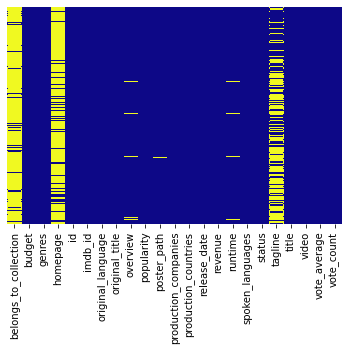

In [21]:
# Visualizing Missing Values
sn.heatmap(kaggle_df.isnull(), cbar=False, yticklabels=False, cmap='plasma')

#Budgets has numerous missing budgets

In [ ]:

At this point we can see that there are 45454 Movies and 23 columns in our dataset
The data types consist of bool(1), datetime64[ns](1), float64(5), int32(1), object(15)
There are a large number of null values in Belongs to collection, homepage, and tageline
Budget needs to get converted to a numeric


In [24]:
# Another item to look for in key numeric fields is 0 values

print(kaggle_df.budget[kaggle_df.budget==0].count())
print(kaggle_df.revenue[kaggle_df.revenue==0].count())

# no zeros in budget or gross columns

36565
38043


In [31]:
# Filter out rows with a zero to a different dataFrame --- if needed --- might use with NAN later on

kaggle_df_0_budget = kaggle_df[kaggle_df.budget==0].reset_index(drop=True)

kaggle_df = kaggle_df[kaggle_df.budget!=0].reset_index(drop=True)

#Check 0 budgets again
kaggle_df.budget[kaggle_df.budget==0].count()

0

In [32]:
# Check for the number of Nulls/Nans
kaggle_df.isnull().sum()

belongs_to_collection    7304
budget                      0
genres                      0
homepage                 6134
id                          0
imdb_id                     2
original_language           0
original_title              0
overview                   47
popularity                  0
poster_path                 7
production_companies        0
production_countries        0
release_date                4
revenue                     0
runtime                    10
spoken_languages            0
status                      3
tagline                  2206
title                       0
video                       0
vote_average                0
vote_count                  0
dtype: int64

##### do something with release date??  Parse it out with the above code or drop it all together

In [36]:
# Drop Columns not going to use
kaggle_df = kaggle_df.drop(['belongs_to_collection'], axis = 1)


In [38]:
kaggle_df = kaggle_df.drop(['homepage'], axis = 1)

In [39]:
kaggle_df = kaggle_df.drop(['tagline'], axis = 1)

In [ ]:
#kaggle_df = kaggle_df.drop(['poster_path'], axis = 1)

In [40]:
kaggle_df.isnull().sum()

budget                   0
genres                   0
id                       0
imdb_id                  2
original_language        0
original_title           0
overview                47
popularity               0
poster_path              7
production_companies     0
production_countries     0
release_date             4
revenue                  0
runtime                 10
spoken_languages         0
status                   3
title                    0
video                    0
vote_average             0
vote_count               0
dtype: int64

In [41]:
# Total number of rows and columns
kaggle_df.shape

# Rows containing duplicate data
duplicate_rows_df = kaggle_df[kaggle_df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

# No Duplicate Rows

number of duplicate rows:  (1, 20)


In [42]:
# Reviewing the unique values in categorical variables  

# ---- not my favorite view, might move this to column breakout analysis and show unique values there

# can scan for an outlier, but the analysis comes later

print('Budget')
print(*list(kaggle_df.budget.unique()))  #to many print to be useful
print('Genres')
print(*list(kaggle_df.genres.unique()))
print('Original Language')
print(*list(kaggle_df.original_language .unique()))
print('Original Title')
print(*list(kaggle_df.original_title.unique()))
print('Popularity ')
print(*list(kaggle_df.popularity .unique()))  #to many print to be useful
print('Production Companies')
print(*list(kaggle_df.production_companies.unique()))
print('Production Countries')
print(*list(kaggle_df.production_countries.unique()))
print('Release_Date ')
print(*list(kaggle_df.release_date .unique()))
print('Revenue')
print(*list(kaggle_df.revenue .unique()))
print('Runtime')
print(*list(kaggle_df.runtime .unique()))
print('Spoken Languages')
print(*list(kaggle_df.spoken_languages.unique()))
print('Status ')
print(*list(kaggle_df.status.unique()))
print('Title ')
print(*list(kaggle_df.title.unique()))
print('Video')
print(*list(kaggle_df.video.unique()))
print('Vote Average')
print(*list(kaggle_df.vote_average.unique()))
print('Vote Count')
print(*list(kaggle_df.vote_count.unique()))

Budget
30000000 65000000 16000000 60000000 58000000 35000000 62000000 44000000 98000000 52000000 16500000 4000000 30250000 50000000 3600000 12000000 18000000 29500000 11000000 10000000 19000000 20000000 33000000 55000000 6000000 15000000 45000000 3500000 8000000 900000 38000000 8169363 47000000 14000000 3000000 7000000 24000000 72000000 1300000 7500000 13365000 25000000 40000000 17000000 31000000 28000000 100000000 2000000 53000000 27000000 90000000 1500000 500000 2 22000000 150000 8 42000000 175000000 2800000 2500000 21000000 27000 700000 5000000 10500000 120 6 5500000 4800000 34000000 400000 32000000 32 6500000 46000000 23000000 11500000 115000000 63000000 45000 26000000 17080000 3200000 13000000 70000000 6900000 57000000 9000000 85000000 13500000 800000 30 48000000 7400000 12500000 200000 1488423 2600000 6244087 9300000 33500000 80000000 220000 275000 25530000 75000000 92000000 1800000 50 1000000 54000000 36000000 2962051 1850000 4500000 2540800 2723903 2479000 325000 2068000 520000

Toy Story Jumanji Waiting to Exhale Heat Sabrina Sudden Death GoldenEye The American President Nixon Cutthroat Island Casino Sense and Sensibility Four Rooms Ace Ventura: When Nature Calls Money Train Get Shorty Assassins Leaving Las Vegas Now and Then La CitÃ© des Enfants Perdus Twelve Monkeys Babe Dead Man Walking Clueless Dead Presidents Restoration Mortal Kombat To Die For How To Make An American Quilt Se7en Pocahontas The Usual Suspects Mighty Aphrodite The Indian in the Cupboard Eye for an Eye Bio-Dome Friday From Dusk Till Dawn Fair Game Big Bully Screamers The Juror Things to Do in Denver When You're Dead Antonia White Squall Dunston Checks In Nick of Time Mary Reilly Vampire in Brooklyn Broken Arrow La Haine Bottle Rocket Unforgettable Happy Gilmore The Bridges of Madison County Braveheart Taxi Driver ç´çªå Before and After Le Bonheur est dans le prÃ© Steal Big Steal Little Boomerang Flirting with Disaster The NeverEnding Story III Jade Up Close & Personal The Birdcage Bad

Tamara Freedomland Winter Passing Eight Below Date Movie Running Scared Madea's Family Reunion Ultraviolet Just My Luck Pulse 16 Blocks Failure to Launch Ice Age: The Meltdown The Big White V for Vendetta She's the Man Thank You for Smoking Find Me Guilty Inside Man Tsotsi Aquamarine Leprechaun 2 Laitakaupungin valot Stranger on the Third Floor The Shaggy Dog Son of the Pink Panther Das Leben der Anderen Nanook of the North Go Tell the Spartans Take the Lead Lucky Number Slevin Volver Akeelah and the Bee Urban Legends: Bloody Mary Stay Alive Basic Instinct 2 Brick The Dead Hate the Living! Evil Aliens The Dark Hours ATL Slither Renaissance Friends with Money Le roi danse Scary Movie 4 Hard Candy Dead Birds A Prairie Home Companion Pinocchio and the Emperor of the Night The Sentinel The Wild Silent Hill Batalla en el cielo American Dreamz Mata Hari à¸à¹à¸¡à¸¢à¸³à¸à¸¸à¹à¸ Mission: Impossible III RV United 93 LolliLove Down in the Valley Over the Hedge Poseidon The Da Vinci Code X-Me

David et Madame Hansen AstÃ©rix: Le domaine des dieux Apflickorna Pumzi 1Â½ Ritter - Auf der Suche nach der hinreiÃenden Herzelinde ë´ ê¹¡í¨ ê°ì ì ì¸ Horrible Bosses 2 Detention of the Dead Donner Pass El Gringo Elvis Has Left the Building Home Before Dark Lost Christmas Enemies Closer Barely Legal The Happy Road à²²à³à²¸à²¿à²¯à²¾ MajoritÃ© OpprimÃ©e Penguins of Madagascar Black or White The Water Diviner Still Alice Paddington Maze Runner: The Scorch Trials Beautiful Girl State of Emergency Cowspiracy: The Sustainability Secret Clouds of Sils Maria Dying of the Light Slasher House ë í¥ å¿ çæ¥å®¶å° Exit Humanity Ð¢ÑÑÐ´Ð½Ð¾ Ð±ÑÑÑ Ð±Ð¾Ð³Ð¾Ð¼ Kill the Messenger Kekkonen Tulee! Jingle All the Way 2 The Face of Love The Hobbit: The Battle of the Five Armies Selma Unbroken White Mischief Fat Pizza House of the Dead 2 The Beales of Grey Gardens Closer to the Moon Free the Nipple Khumba A Girl Walks Home Alone at Night 1987 Mommy A Most Violent Year Wild The Curse of King 

21.946943 17.015539 3.859495 17.924927 6.677277 5.23158 14.686036 6.318445 5.092 7.284477 10.137389 10.673167 9.026586 8.205448 7.337906 12.669608 11.065939 10.332025 8.681325 9.822423 12.297305 14.404764 6.891317 9.882383 9.87957 10.979269 10.870138 10.448481 4.485958 18.45743 13.280069 16.302466 15.899134 10.673296 4.733526 6.387469 14.56965 15.339153 5.912223 2.936443 12.758848 6.010579 4.486179 2.030174 9.568604 4.814825 6.848591 12.866139 9.071127 14.957626 12.108196 6.904831 2.464425 9.592265 5.951077 20.755149 14.092713 12.314278 2.938293 1.254885 1.522412 6.506983 5.579088 6.252377 11.418917 3.402749 6.49968 9.262184 0.922958 18.761467 10.193549 13.321354 11.528147 5.391556 12.812539 4.558992 7.260574 8.657365 6.950458 4.646132 15.138855 15.178338 14.810519 11.715868 8.184815 4.877872 10.058329 8.25547 7.024227 2.466066 13.304342 1.165039 10.187623 6.752119 17.502375 5.552946 13.492845 11.223055 1.820419 7.490247 9.715639 16.885184 1.834099 8.922139 2.486073 11.304979 6.638116 

12.536621 0.920414 1.48335 14.75562 13.793301 9.649312 13.00941 3.311392 9.662564 7.930423 8.212132 6.710598 4.678848 6.632194 2.542612 0.889745 12.17886 4.584117 6.397109 7.275649 5.695408 1.802597 4.482793 0.075176 7.120403 9.111782 6.876053 1.529879 6.650064 8.129407 0.452934 0.739298 6.69573 1.311671 1.094643 3.08132 1.551992 0.003324 1.633103 16.972995 5.860115 0.998151 13.081203 15.138144 15.904834 5.416588 0.980913 0.518603 0.379884 10.279685 9.819864 17.674048 7.941637 0.234366 1.202218 8.172013 0.666828 7.095445 2.894924 1.280455 0.300118 3.521957 11.11946 4.874409 5.271855 7.681383 7.094276 12.820452 7.824962 5.174738 6.36477 11.275132 3.232681 10.30535 2.334013 6.154375 11.024462 10.964499 0.265854 8.278794 6.971611 2.058133 1.845584 0.44374 2.927226 5.305905 11.634377 10.997518 12.595165 7.671851 5.282976 10.425288 5.546687 4.476836 7.388933 6.407803 1.280497 4.334513 7.942766 4.820191 16.201377 16.626655 11.73956 11.176797 11.603905 0.235217 12.989056 6.303785 0.842907 0.5

0.400418 0.688993 6.944457 1.760193 2.379429 4.875172 0.164002 1.216497 9.143457 0.202118 8.362716 8.228918 3.447894 0.804489 0.588872 11.824404 36.567575 19.94393 28.920839 20.02976 14.017754 8.167673 0.669257 0.079287 0.354748 0.437969 0.994288 0.350207 3.517714 20.303632 16.816834 0.177258 0.381672 11.599716 1.324337 7.873407 2.685498 7.950711 1.412333 9.855927 0.041316 15.884744 17.523343 14.531429 20.045673 3.699552 1.82926 0.187552 2.057404 0.146868 0.240512 0.10425 27.54107 3.822114 9.863789 8.792104 2.02267 0.9208 2.080781 31.314013 14.547939 16.01076 0.364806 16.53732 0.561648 22.831649 14.801195 12.240817 13.28436 5.978316 2.84929 3.880153 9.609879 17.918269 19.225832 17.070748 17.046052 13.90698 17.630487 4.419157 0.003025 2.254096 4.591036 0.542637 1.176258 24.535733 1.426776 14.320893 1.948382 49.247505 36.894806 54.581997 29.429112 4.69328 17.645877 1.374192 38.995136 15.352467 0.339659 0.901269 0.819833 8.079555 44.251369 15.909181 287.253654 0.50606 13.392824 1.007084 4

[{'name': 'Pixar Animation Studios', 'id': 3}] [{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}] [{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}] [{'name': 'Regency Enterprises', 'id': 508}, {'name': 'Forward Pass', 'id': 675}, {'name': 'Warner Bros.', 'id': 6194}] [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'Scott Rudin Productions', 'id': 258}, {'name': 'Mirage Enterprises', 'id': 932}, {'name': 'Sandollar Productions', 'id': 5842}, {'name': 'Constellation Entertainment', 'id': 14941}, {'name': 'Worldwide', 'id': 55873}, {'name': 'Mont Blanc Entertainment GmbH', 'id': 58079}] [{'name': 'Universal Pictures', 'id': 33}, {'name': 'Imperial Entertainment', 'id': 21437}, {'name': 'Signature Entertainment', 'id': 23770}] [{'name': 'United Artists', 'id': 60}, {'name': 'Eon Productions', 'id': 7576}] [{'name': 'Columbia Pictures', 'id': 5}, {'name': 'Castle Rock Entertainment', 'id': 97}]

 [{'name': 'Vishesh Films', 'id': 3749}] [{'name': 'PVR Cinemas', 'id': 3661}] [{'name': 'UTV Motion Pictures', 'id': 2320}, {'name': 'Bhandarkar Entertainment', 'id': 3724}] [{'name': 'One More Thought Entertainment', 'id': 3124}] [{'name': 'Varahi Chalana Chitram', 'id': 44160}, {'name': 'Suresh Productions', 'id': 44161}] [{'name': 'KillerWolf Films', 'id': 50983}] [{'name': 'People Pictures', 'id': 3694}] [{'name': 'Les Films Du Fleuve', 'id': 1926}] [{'name': 'Ajay Devgn Films', 'id': 4336}] [{'name': 'Le Bureau', 'id': 2137}, {'name': "RÃ©gion Provence CÃ´te d'Azur", 'id': 2318}, {'name': 'Canal+', 'id': 5358}, {'name': 'CinÃ©CinÃ©ma', 'id': 6301}, {'name': 'RÃ©gion Ile-de-France', 'id': 11246}, {'name': 'SoficinÃ©ma 5', 'id': 12400}, {'name': 'Banque Populaire Images 10', 'id': 12609}] [{'name': 'Eros International', 'id': 3653}, {'name': 'Shree Ashtavinayak Cinevision Ltd', 'id': 3748}] [{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Wide Frame Pictures', 'id': 14041}, {'name'

1995-10-30T00:00:00.000000000 1995-12-15T00:00:00.000000000 1995-12-22T00:00:00.000000000 1995-11-16T00:00:00.000000000 1995-11-17T00:00:00.000000000 1995-11-22T00:00:00.000000000 1995-12-13T00:00:00.000000000 1995-12-09T00:00:00.000000000 1995-11-10T00:00:00.000000000 1995-11-21T00:00:00.000000000 1995-10-20T00:00:00.000000000 1995-10-06T00:00:00.000000000 1995-10-27T00:00:00.000000000 1995-05-16T00:00:00.000000000 1995-12-29T00:00:00.000000000 1995-07-18T00:00:00.000000000 1995-07-19T00:00:00.000000000 1995-08-18T00:00:00.000000000 1995-05-20T00:00:00.000000000 1995-09-22T00:00:00.000000000 1995-06-14T00:00:00.000000000 1995-09-13T00:00:00.000000000 1995-07-14T00:00:00.000000000 1996-01-12T00:00:00.000000000 1995-04-26T00:00:00.000000000 1996-01-19T00:00:00.000000000 1995-11-03T00:00:00.000000000 1996-01-26T00:00:00.000000000 1995-09-08T00:00:00.000000000 1996-02-02T00:00:00.000000000 1995-12-01T00:00:00.000000000 1995-09-12T00:00:00.000000000 1996-02-23T00:00:00.000000000 1995-10-26

2012-09-01T00:00:00.000000000 2013-01-11T00:00:00.000000000 2013-01-18T00:00:00.000000000 2013-01-12T00:00:00.000000000 2013-01-17T00:00:00.000000000 2013-04-05T00:00:00.000000000 2012-02-12T00:00:00.000000000 2011-05-04T00:00:00.000000000 2013-01-01T00:00:00.000000000 1994-05-31T00:00:00.000000000 2013-01-04T00:00:00.000000000 2013-01-23T00:00:00.000000000 2012-05-21T00:00:00.000000000 2013-05-31T00:00:00.000000000 2010-09-26T00:00:00.000000000 2010-06-19T00:00:00.000000000 2013-02-07T00:00:00.000000000 2013-02-01T00:00:00.000000000 2009-05-26T00:00:00.000000000 2010-11-27T00:00:00.000000000 2013-02-13T00:00:00.000000000 2013-02-06T00:00:00.000000000 2013-03-01T00:00:00.000000000 2012-11-04T00:00:00.000000000 2013-02-14T00:00:00.000000000 2013-02-15T00:00:00.000000000 2013-02-21T00:00:00.000000000 2012-07-03T00:00:00.000000000 1990-12-13T00:00:00.000000000 2013-02-27T00:00:00.000000000 2013-02-28T00:00:00.000000000 2013-03-26T00:00:00.000000000 2013-03-07T00:00:00.000000000 2013-03-20

373554033.0 262797249.0 81452156.0 187436818.0 0.0 64350171.0 352194034.0 107879496.0 13681765.0 10017322.0 116112375.0 135000000.0 4300000.0 212385533.0 35431113.0 115101622.0 30303072.0 49800000.0 27400000.0 1738611.0 168840000.0 254134910.0 39363635.0 122195920.0 21284514.0 23574130.0 327311859.0 346079773.0 23341568.0 6700000.0 28215918.0 25836616.0 11534477.0 2042530.0 5781885.0 529766.0 10300000.0 8175346.0 12379402.0 19800000.0 150270147.0 560069.0 41205099.0 182016617.0 210000000.0 28262574.0 32392047.0 6278139.0 70100000.0 14702438.0 9851610.0 185260553.0 141407024.0 851545.0 355237933.0 31596911.0 336529144.0 1275000.0 178104.0 287928194.0 13071518.0 152022101.0 157387195.0 25405445.0 16140822.0 366101666.0 127600435.0 7563728.0 19075720.0 113493481.0 7412216.0 1148752.0 2122561.0 66000000.0 1.0 110627965.0 472370.0 16.0 10382407.0 20350754.0 8349430.0 113374103.0 7959291.0 5780000.0 104324083.0 50012507.0 264218220.0 2616503.0 5535405.0 26488734.0 23450000.0 3151130.0 222000

81.0 104.0 127.0 170.0 106.0 130.0 192.0 119.0 178.0 136.0 98.0 90.0 103.0 105.0 132.0 112.0 100.0 108.0 129.0 89.0 122.0 97.0 117.0 101.0 116.0 95.0 96.0 88.0 91.0 118.0 102.0 92.0 135.0 177.0 114.0 113.0 140.0 139.0 121.0 83.0 128.0 109.0 134.0 107.0 94.0 145.0 99.0 115.0 123.0 171.0 133.0 110.0 154.0 142.0 86.0 141.0 111.0 191.0 87.0 144.0 125.0 93.0 138.0 195.0 131.0 76.0 120.0 80.0 137.0 181.0 126.0 84.0 78.0 79.0 74.0 149.0 175.0 238.0 201.0 167.0 143.0 64.0 75.0 82.0 174.0 147.0 160.0 151.0 162.0 71.0 124.0 161.0 216.0 153.0 200.0 229.0 193.0 172.0 183.0 85.0 212.0 287.0 150.0 155.0 194.0 152.0 163.0 70.0 207.0 164.0 169.0 197.0 77.0 8.0 72.0 159.0 69.0 73.0 67.0 184.0 156.0 157.0 158.0 148.0 189.0 188.0 146.0 202.0 68.0 5.0 165.0 180.0 199.0 248.0 182.0 53.0 219.0 173.0 208.0 179.0 62.0 214.0 168.0 224.0 186.0 66.0 220.0 283.0 225.0 292.0 63.0 176.0 59.0 29.0 60.0 422.0 317.0 366.0 185.0 6.0 14.0 450.0 190.0 352.0 187.0 0.0 47.0 12.0 255.0 26.0 213.0 65.0 27.0 28.0 166.0 33.0 4

Toy Story Jumanji Waiting to Exhale Heat Sabrina Sudden Death GoldenEye The American President Nixon Cutthroat Island Casino Sense and Sensibility Four Rooms Ace Ventura: When Nature Calls Money Train Get Shorty Assassins Leaving Las Vegas Now and Then The City of Lost Children Twelve Monkeys Babe Dead Man Walking Clueless Dead Presidents Restoration Mortal Kombat To Die For How To Make An American Quilt Se7en Pocahontas The Usual Suspects Mighty Aphrodite The Indian in the Cupboard Eye for an Eye Bio-Dome Friday From Dusk Till Dawn Fair Game Big Bully Screamers The Juror Things to Do in Denver When You're Dead Antonia's Line White Squall Dunston Checks In Nick of Time Mary Reilly Vampire in Brooklyn Broken Arrow La Haine Bottle Rocket Unforgettable Happy Gilmore The Bridges of Madison County Braveheart Taxi Driver Rumble in the Bronx Before and After Happiness Is in the Field Steal Big Steal Little Boomerang Flirting with Disaster The Neverending Story III: Escape from Fantasia Jade U

The Good Guy The Yellow Handkerchief The Kids Are All Right Salt Mr. Nobody The Silver Chalice Dinner for Schmucks Nanny McPhee and the Big Bang Hellsinki 2:13 Ip Man 2 Charlie St. Cloud The Other Guys The Kautokeino Rebellion Invisible Agent The Expendables Scott Pilgrim vs. the World Animal Kingdom Centurion Life During Wartime The Experiment Black Water Piranha 3D The Extraordinary Adventures of AdÃ¨le Blanc-Sec Get Low The Joneses Giallo Gaby: A True Story TEKKEN Narco The Last Exorcism The American The Switch Elephants Dream Fear and Desire The End of Poverty? Machete Step Up 3D Going the Distance Homecoming Vampires Suck Resident Evil: Afterlife Preacher's Kid 22 Bullets Heroes for Sale The Pornographer Our Relations Freedom Park Hungry Wives The Social Network Superman/Batman: Apocalypse The Married Woman The Town Easy A Eat Pray Love Howl Camp Hell Blue Gold: World Water Wars Saratoga Trunk Flipped Wall Street: Money Never Sleeps Legend of the Guardians: The Owls of Ga'Hoole Ca

 Little Witch Academia Cemetery of Splendour Crumbs The Idealist Arthur & Merlin Nightbeast Hotel Transylvania 2 Too Young to Marry Godfather Varalaru Necessary Evil Freeheld By the Sea The Little Prince Food Chains Narcopolis The Cut Wonder Woman Iron Sky: The Coming Race The Circle Silence Bikini Girls on Ice Bridge of Spies A Tale of Love and Darkness The Italian Key Morlang Ghost Writer Into the Grizzly Maze Human Roukli Swat: Unit 887 Say Uncle Nous York Schoolgirls in Chains Criminally Insane Eden Cruel World Hail, Caesar! Miss Conception Cayman Went Hunt to Kill iNumber Number Look Who's Back TimeScapes The Cost of Love Re-Kill Catch That Girl Standing Tall Bicycle Dreams Big Match A Better Tomorrow A Good Man Once a Gangster Countdown Righteous Ties Turning Point Hidden Straight A's Bunshinsaba: Ouija Board The Bullet Vanishes No. 2 R2B: Return to Base Legendary Assassin Runaway Fakta Ladh Mhana Overheard 2 Heaven's Soldiers Goosebumps Back in Time Creative Control Rita's Last 

5415.0 2413.0 34.0 1886.0 141.0 174.0 1194.0 199.0 72.0 137.0 1343.0 364.0 539.0 1128.0 224.0 305.0 394.0 365.0 91.0 308.0 2470.0 756.0 350.0 828.0 80.0 30.0 452.0 177.0 38.0 5915.0 1509.0 3334.0 145.0 136.0 65.0 110.0 513.0 1644.0 54.0 16.0 154.0 87.0 26.0 86.0 59.0 190.0 77.0 113.0 459.0 695.0 285.0 22.0 767.0 397.0 3404.0 2632.0 245.0 37.0 23.0 7.0 139.0 66.0 105.0 45.0 51.0 303.0 1729.0 11.0 1637.0 151.0 1529.0 28.0 57.0 1045.0 69.0 214.0 508.0 898.0 88.0 2094.0 319.0 406.0 380.0 643.0 280.0 64.0 400.0 153.0 36.0 359.0 14.0 111.0 261.0 115.0 457.0 334.0 9.0 217.0 168.0 1017.0 25.0 27.0 35.0 984.0 464.0 48.0 769.0 184.0 1894.0 639.0 24.0 299.0 17.0 90.0 112.0 1558.0 10.0 381.0 83.0 6778.0 222.0 207.0 70.0 636.0 272.0 128.0 4.0 927.0 522.0 4293.0 8670.0 431.0 33.0 251.0 317.0 942.0 501.0 8358.0 21.0 140.0 461.0 15.0 943.0 163.0 340.0 104.0 1684.0 390.0 287.0 980.0 559.0 8147.0 654.0 41.0 5520.0 76.0 297.0 2550.0 535.0 40.0 180.0 71.0 426.0 1814.0 288.0 1138.0 203.0 31.0 330.0 307.0 1

In [43]:
## Review data types again now that we have seen the unique values and determine if any need to be changed? 

# Release date needs to be cleaned to be useful
# Year needs to be converted to Category so it isn't treated like a number

kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8889 entries, 0 to 8888
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                8889 non-null   int32         
 1   genres                8889 non-null   object        
 2   id                    8889 non-null   object        
 3   imdb_id               8887 non-null   object        
 4   original_language     8889 non-null   object        
 5   original_title        8889 non-null   object        
 6   overview              8842 non-null   object        
 7   popularity            8889 non-null   float64       
 8   poster_path           8882 non-null   object        
 9   production_companies  8889 non-null   object        
 10  production_countries  8889 non-null   object        
 11  release_date          8885 non-null   datetime64[ns]
 12  revenue               8889 non-null   float64       
 13  runtime           

In [45]:
print('Runtime')
print(*list(kaggle_df.runtime .unique()))

Runtime
81.0 104.0 127.0 170.0 106.0 130.0 192.0 119.0 178.0 136.0 98.0 90.0 103.0 105.0 132.0 112.0 100.0 108.0 129.0 89.0 122.0 97.0 117.0 101.0 116.0 95.0 96.0 88.0 91.0 118.0 102.0 92.0 135.0 177.0 114.0 113.0 140.0 139.0 121.0 83.0 128.0 109.0 134.0 107.0 94.0 145.0 99.0 115.0 123.0 171.0 133.0 110.0 154.0 142.0 86.0 141.0 111.0 191.0 87.0 144.0 125.0 93.0 138.0 195.0 131.0 76.0 120.0 80.0 137.0 181.0 126.0 84.0 78.0 79.0 74.0 149.0 175.0 238.0 201.0 167.0 143.0 64.0 75.0 82.0 174.0 147.0 160.0 151.0 162.0 71.0 124.0 161.0 216.0 153.0 200.0 229.0 193.0 172.0 183.0 85.0 212.0 287.0 150.0 155.0 194.0 152.0 163.0 70.0 207.0 164.0 169.0 197.0 77.0 8.0 72.0 159.0 69.0 73.0 67.0 184.0 156.0 157.0 158.0 148.0 189.0 188.0 146.0 202.0 68.0 5.0 165.0 180.0 199.0 248.0 182.0 53.0 219.0 173.0 208.0 179.0 62.0 214.0 168.0 224.0 186.0 66.0 220.0 283.0 225.0 292.0 63.0 176.0 59.0 29.0 60.0 422.0 317.0 366.0 185.0 6.0 14.0 450.0 190.0 352.0 187.0 0.0 47.0 12.0 255.0 26.0 213.0 65.0 27.0 28.0 166.

In [47]:
# In looking at the unique values there was a movie with a run time of 366 minites whcih seems like an outlier
# Reviewing the row to get more information
# For now it will be left in --------------------------------------------------
kaggle_df[kaggle_df.runtime==500.0]

budget                                             genres     id  \
7741  5000000  [{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...  51129   

        imdb_id original_language                      original_title  \
7741  tt0403783                ru  ÐÐ°ÑÑÐµÑ Ð¸ ÐÐ°ÑÐ³Ð°ÑÐ¸ÑÐ°   

                                               overview  popularity  \
7741  The Master and Margarita is a Russian TV mini-...    1.491124   

                           poster_path production_companies  \
7741  /26vV51EarKPZ9Lc10tqhiJbYlHl.jpg                   []   

     production_countries release_date  revenue  runtime  \
7741                   []   2005-12-19      0.0    500.0   

                                    spoken_languages    status  \
7741  [{'iso_639_1': 'ru', 'name': 'PÑÑÑÐºÐ¸Ð¹'}]  Released   

                         title  video  vote_average  vote_count  
7741  The Master and Margarita  False           6.2         9.0

In [ ]:
## Years is showing as an integer and needs to be converted to a category
movies_df.year=pd.Categorical(movies_df.year)



#### Does anything else need to be converted to categorical?

In [48]:
# Check to see if changes took place
kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8889 entries, 0 to 8888
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                8889 non-null   int32         
 1   genres                8889 non-null   object        
 2   id                    8889 non-null   object        
 3   imdb_id               8887 non-null   object        
 4   original_language     8889 non-null   object        
 5   original_title        8889 non-null   object        
 6   overview              8842 non-null   object        
 7   popularity            8889 non-null   float64       
 8   poster_path           8882 non-null   object        
 9   production_companies  8889 non-null   object        
 10  production_countries  8889 non-null   object        
 11  release_date          8885 non-null   datetime64[ns]
 12  revenue               8889 non-null   float64       
 13  runtime           

In [49]:
# Display only numeric cloumns
# The describe function provides the count, mean, standard deviation, minimum and maximum values and the quantities of 
# the data.
kaggle_df.describe().T 


count          mean           std  min           25%  \
budget        8889.0  2.160662e+07  3.431184e+07  1.0  2.000000e+06   
popularity    8889.0  7.367587e+00  1.143034e+01  0.0  2.148655e+00   
revenue       8889.0  5.467452e+07  1.365927e+08  0.0  0.000000e+00   
runtime       8879.0  1.053860e+02  2.829238e+01  0.0  9.100000e+01   
vote_average  8889.0  6.013365e+00  1.247723e+00  0.0  5.400000e+00   
vote_count    8889.0  4.667990e+02  1.030341e+03  0.0  2.000000e+01   

                       50%           75%           max  
budget        8.000000e+06  2.500000e+07  3.800000e+08  
popularity    6.322844e+00  1.001425e+01  5.474883e+02  
revenue       3.221152e+06  4.479322e+07  2.787965e+09  
runtime       1.010000e+02  1.160000e+02  7.050000e+02  
vote_average  6.200000e+00  6.800000e+00  1.000000e+01  
vote_count    9.400000e+01  4.070000e+02  1.407500e+04


After some addition data exploration we determined that the Years column should be converted to a category
In looking at the values from the describe function it appears that there are some outliers in all of the numric fields whenyou see the difference between the 75% and the max number


In [50]:
# Display all cloumns
kaggle_df.describe(include='all').T

# Look at the difference between 75% and Max for Budget

count unique  \
budget                8889.0    NaN   
genres                  8889   1749   
id                      8889   8879   
imdb_id                 8887   8877   
original_language       8889     54   
original_title          8889   8685   
overview                8842   8825   
popularity            8889.0    NaN   
poster_path             8882   8872   
production_companies    8889   6638   
production_countries    8889    846   
release_date            8885   5530   
revenue               8889.0    NaN   
runtime               8879.0    NaN   
spoken_languages        8889    883   
status                  8886      3   
title                   8889   8651   
video                   8889      1   
vote_average          8889.0    NaN   
vote_count            8889.0    NaN   

                                                                    top  freq  \
budget                                                              NaN   NaN   
genres                                    [{'id': 18, 'name': 'Drama'}]   669   
id                                                               110428     2   
imdb_id                                                       tt2818654     2   
original_language                                                    en  7433   
original_title                                                  Inferno     4   
overview                                             No overview found.     7   
popularity                                                          NaN   NaN   
poster_path                            /o3Im9nPLAgtlw1j2LtpMebAotSe.jpg     2   
production_companies                                                 []   731   
production_countries  [{'iso_3166_1': 'US', 'name': 'United States o...  4863   
release_date                                        2007-01-01 00:00:00    16   
revenue                                                             NaN   NaN   
runtime                                                             NaN   NaN   
spoken_languages               [{'iso_639_1': 'en', 'name': 'English'}]  5308   
status                                                         Released  8864   
title                                                           Inferno     4   
video                                                             False  8889   
vote_average                                                        NaN   NaN   
vote_count                                                          NaN   NaN   

                          first       last             mean               std  \
budget                      NaT        NaT  21606623.534368   34311844.575389   
genres                      NaT        NaT              NaN               NaN   
id                          NaT        NaT              NaN               NaN   
imdb_id                     NaT        NaT              NaN               NaN   
original_language           NaT        NaT              NaN               NaN   
original_title              NaT        NaT              NaN               NaN   
overview                    NaT        NaT              NaN               NaN   
popularity                  NaT        NaT         7.367587          11.43034   
poster_path                 NaT        NaT              NaN               NaN   
production_companies        NaT        NaT              NaN               NaN   
production_countries        NaT        NaT              NaN               NaN   
release_date         1902-09-01 2018-12-31              NaN               NaN   
revenue                     NaT        NaT  54674521.499044  136592661.323999   
runtime                     NaT        NaT       105.385967         28.292383   
spoken_languages            NaT        NaT              NaN               NaN   
status                      NaT        NaT              NaN               NaN   
title                       NaT        NaT              NaN               NaN   
video                       NaT        NaT 

In [53]:
# Lets take a look at the movie with a 380m budget
kaggle_df[kaggle_df.budget==380000000.0]

budget                                             genres    id  \
5329  380000000  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...  1865   

        imdb_id original_language  \
5329  tt1298650                en   

                                   original_title  \
5329  Pirates of the Caribbean: On Stranger Tides   

                                               overview  popularity  \
5329  Captain Jack Sparrow crosses paths with a woma...    27.88772   

                           poster_path  \
5329  /wNUDAq5OUMOtxMlz64YaCp7gZma.jpg   

                                   production_companies  \
5329  [{'name': 'Walt Disney Pictures', 'id': 2}, {'...   

                                   production_countries release_date  \
5329  [{'iso_3166_1': 'US', 'name': 'United States o...   2011-05-14   

           revenue  runtime  \
5329  1.045714e+09    136.0   

                                       spoken_languages    status  \
5329  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   

                                            title  video  vote_average  \
5329  Pirates of the Caribbean: On Stranger Tides  False           6.4   

      vote_count  
5329      5068.0

In [57]:
# Lets take a look at the movie with a 2 trillion in gross revenue

kaggle_df[kaggle_df.revenue==2787965087.0]

budget                                             genres     id  \
4805  237000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  19995   

        imdb_id original_language original_title  \
4805  tt0499549                en         Avatar   

                                               overview  popularity  \
4805  In the 22nd century, a paraplegic Marine is di...  185.070892   

                           poster_path  \
4805  /kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg   

                                   production_companies  \
4805  [{'name': 'Ingenious Film Partners', 'id': 289...   

                                   production_countries release_date  \
4805  [{'iso_3166_1': 'US', 'name': 'United States o...   2009-12-10   

           revenue  runtime  \
4805  2.787965e+09    162.0   

                                       spoken_languages    status   title  \
4805  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released  Avatar   

      video  vote_average  vote_count  
4805  False           7.2     12114.0

In [ ]:
# Display all cloumns
# movies_df.describe(include='all')

# Correlation Analysis

<AxesSubplot:>

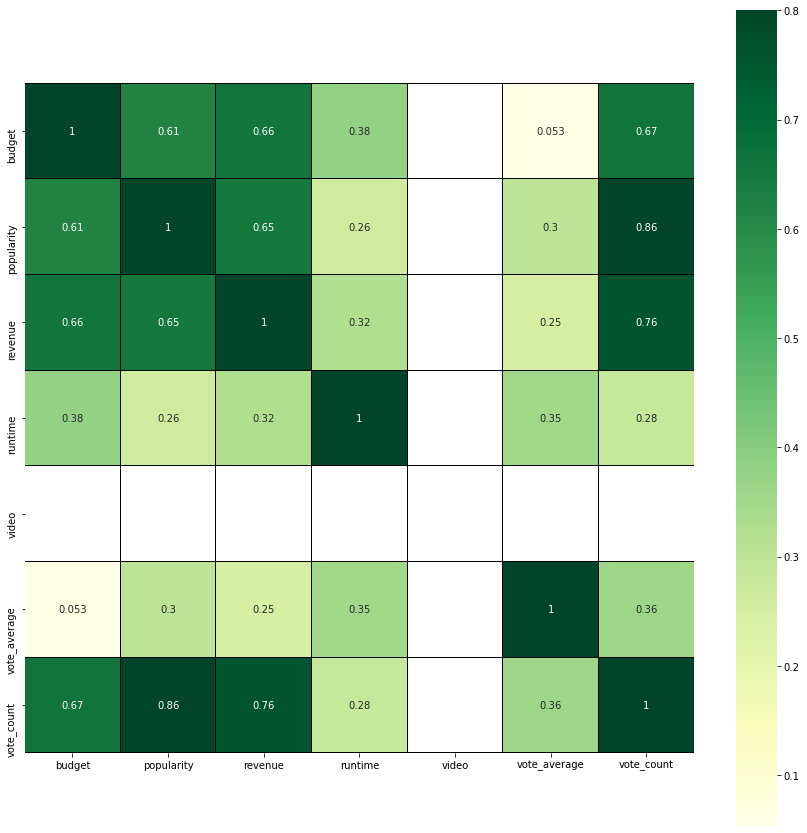

In [58]:
# HeatMaps: are a type of plot which is necessary to find the dependent variables. 
# One of the best ways to find the relationship between the features can be done using heat maps

corr=kaggle_df.corr(method='spearman')
plt.figure(figsize=(15,15))
sn.heatmap(corr,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='YlGn',linecolor='black')

# Below, positive correlation is represented by dark shades and negative correlation by lighter shades.
# shows if one variable influenced by other variable

# Votes influences revenue the most with a positive correlation of .74
# Budget influences revenue the with a positive correlation of .69

In [59]:
# Numerical Representation of the Correlations
corr = kaggle_df.corr()
corr

budget  popularity   revenue   runtime  video  vote_average  \
budget        1.000000    0.368638  0.740050  0.223250    NaN      0.094938   
popularity    0.368638    1.000000  0.476461  0.122593    NaN      0.188217   
revenue       0.740050    0.476461  1.000000  0.171715    NaN      0.175108   
runtime       0.223250    0.122593  0.171715  1.000000    NaN      0.274795   
video              NaN         NaN       NaN       NaN    NaN           NaN   
vote_average  0.094938    0.188217  0.175108  0.274795    NaN      1.000000   
vote_count    0.619899    0.516841  0.792314  0.182653    NaN      0.267668   

              vote_count  
budget          0.619899  
popularity      0.516841  
revenue         0.792314  
runtime         0.182653  
video                NaN  
vote_average    0.267668  
vote_count      1.000000

<AxesSubplot:xlabel='budget', ylabel='revenue'>

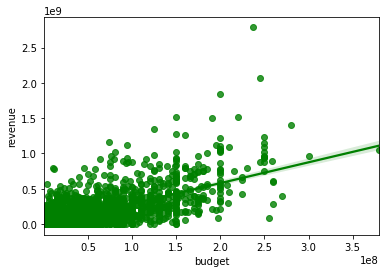

In [61]:
# plots between independent variable - runtime  and target variable - gross
sn.regplot(x=kaggle_df.budget, y=kaggle_df.revenue, color='g')

In [ ]:
# plots between independent variable - runtime  and target variable - gross
sn.regplot(x=movies_df.runtime, y=movies_df.gross, color='g')

### Need a comment here on the correlation analysis


In [62]:
## Analysis of numeric variables

## Function for finding outliers

def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

def plotchart(col):
    fix, (ax1,ax2) =plt.subplots(1,2,figsize=(7,5))
    sn.boxplot(col, orient='v',ax=ax1)
    ax1.set_ylabel=col.name
    ax1.set_title('Box plot of {}'.format(col.name))
    sn.distplot(col,ax=ax2) 
    ax2.set_title('Distribution plot of {}'.format(col.name))
    
def analysis_column(col):
    print('count of outliers ', len(findoutliers(col)))
    print('Mean ',format(col.mean()))
    print('Median ',format(col.median()))
    print('Missing values',format(col.isnull().sum()))
    print('% of Missing values',format(round(100*(col.isnull().sum()/len(col)),2)))
    
    plotchart(col)

Revenue Analysis

In [65]:
# Analysis on Revenue
# we know Q3 AND Q1 AND IQR=Q3-Q1, any data point which is less than Q1-1.5IQR or Q3+1.5IQR are consider as outlier
# There seem to be outliers at the upper end of the Gross Revenue

Q1=kaggle_df.revenue.quantile(.25)
Q3=kaggle_df.revenue.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",kaggle_df.revenue.min())
print("Max Value ",kaggle_df.revenue.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

Min Value 0.0
Max Value  2787965087.0
Q1  0.0
Q3  44793222.0
IQR  44793222.0
lower_limit -67189833.0
upper_limit 111983055.0


count of outliers  1220
Mean  54674521.49904376
Median  3221152.0
Missing values 0
% of Missing values 0.0


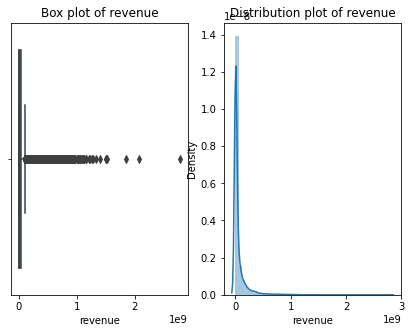

In [67]:
# Revenue Analysis and Individual metric to look for outliers and distribution of data
analysis_column(kaggle_df.revenue)

<AxesSubplot:>

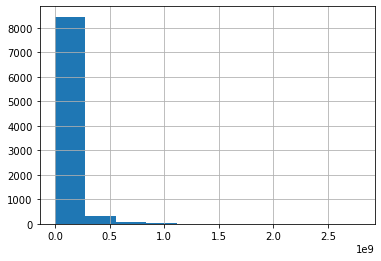

In [66]:
# Gross Histogram — refers to the frequency of occurrence of variables in an interval.
kaggle_df.revenue.hist()

Text(0, 0.5, 'Number of Movies')

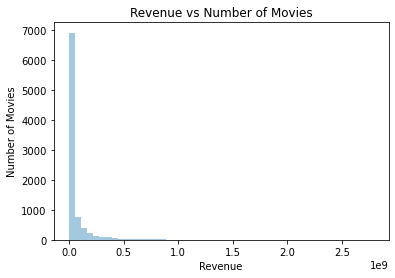

In [68]:
# Revenue vs # of Movies
ax_revenue = sn.distplot(kaggle_df.revenue,kde=False)
ax_revenue.set_title('Revenue vs Number of Movies')
ax_revenue.set_xlabel('Revenue')
ax_revenue.set_ylabel('Number of Movies')
#plt.savefig("revenue_vs_number_of_movies.png")

Budget Analysis

In [69]:
# Analysis on Budget
# we know Q3 AND Q1 AND IQR=Q3-Q1, any data point which is less than Q1-1.5IQR or Q3+1.5IQR are consider as outlier
# There seem to be outliers at the upper end of the budget

Q1=kaggle_df.budget.quantile(.25)
Q3=kaggle_df.budget.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",kaggle_df.budget.min())
print("Max Value ",kaggle_df.budget.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

Min Value 1
Max Value  380000000
Q1  2000000.0
Q3  25000000.0
IQR  23000000.0
lower_limit -32500000.0
upper_limit 59500000.0


count of outliers  930
Mean  21606623.53436832
Median  8000000.0
Missing values 0
% of Missing values 0.0


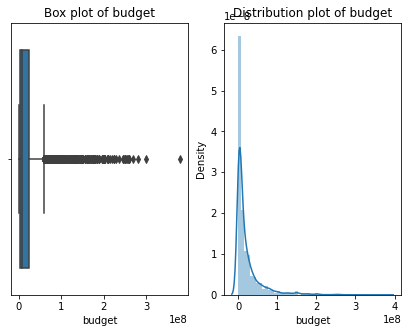

In [70]:
# Budget Analysis and Individual metric to look for outliers and distribution of data
analysis_column(kaggle_df.budget)

<AxesSubplot:>

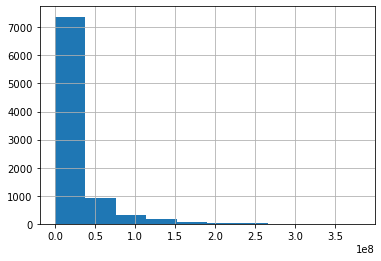

In [71]:
kaggle_df.budget.hist()
# Histogram — refers to the frequency of occurrence of variables in an interval.

Runtime Analysis

In [73]:
# Analysis on Runtime
# we know Q3 AND Q1 AND IQR=Q3-Q1, any data point which is less than Q1-1.5IQR or Q3+1.5IQR are consider as outlier

Q1=kaggle_df.runtime.quantile(.25)
Q3=kaggle_df.runtime.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",kaggle_df.runtime.min())
print("Max Value ",kaggle_df.runtime.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

Min Value 0.0
Max Value  705.0
Q1  91.0
Q3  116.0
IQR  25.0
lower_limit 53.5
upper_limit 153.5


count of outliers  505
Mean  105.38596688816308
Median  101.0
Missing values 10
% of Missing values 0.11


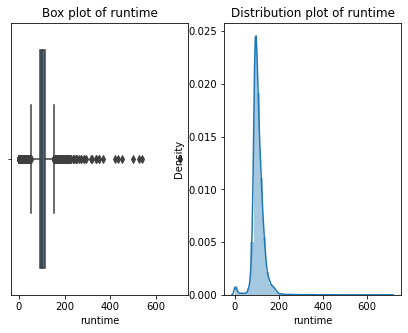

In [74]:
# Analysis and Individual metric to look for outliers and distribution of data
analysis_column(kaggle_df.runtime)

<AxesSubplot:>

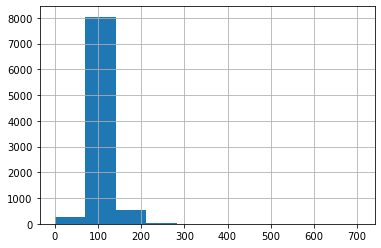

In [75]:
# Runtime Histogram — refers to the frequency of occurrence of variables in an interval.
kaggle_df.runtime.hist()

In [76]:
# Analysis on Votes
# we know Q3 AND Q1 AND IQR=Q3-Q1, any data point which is less than Q1-1.5IQR or Q3+1.5IQR are consider as outlier

Q1=kaggle_df.vote_average.quantile(.25)
Q3=kaggle_df.vote_average.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",kaggle_df.vote_average.min())
print("Max Value ",kaggle_df.vote_average.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

Min Value 0.0
Max Value  10.0
Q1  5.4
Q3  6.8
IQR  1.3999999999999995
lower_limit 3.300000000000001
upper_limit 8.899999999999999


count of outliers  269
Mean  6.013364832939639
Median  6.2
Missing values 0
% of Missing values 0.0


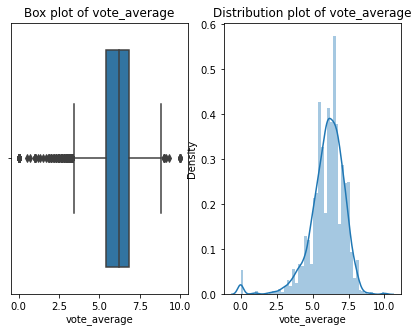

In [77]:
# Analysis and Individual metric to look for outliers and distribution of data
analysis_column(kaggle_df.vote_average)

In [79]:
# Analysis on Score
# we know Q3 AND Q1 AND IQR=Q3-Q1, any data point which is less than Q1-1.5IQR or Q3+1.5IQR are consider as outlier

Q1=kaggle_df.popularity.quantile(.25)
Q3=kaggle_df.popularity.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",kaggle_df.popularity.min())
print("Max Value ",kaggle_df.popularity.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

Min Value 0.0
Max Value  547.488298
Q1  2.148655
Q3  10.014248
IQR  7.8655930000000005
lower_limit -9.649734500000001
upper_limit 21.8126375


In [80]:
print(len(findoutliers(kaggle_df.popularity))) # of rows having outlier

191


count of outliers  191
Mean  7.367587419844715
Median  6.322844
Missing values 0
% of Missing values 0.0


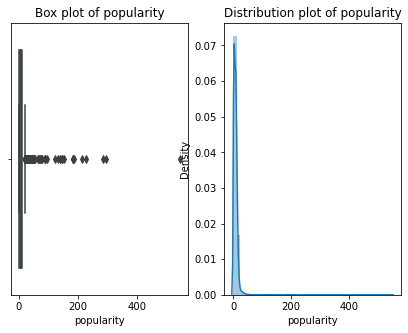

In [82]:
# Analysis and Individual metric to look for outliers and distribution of data
analysis_column(kaggle_df.popularity)

### Histogram  Visualizations

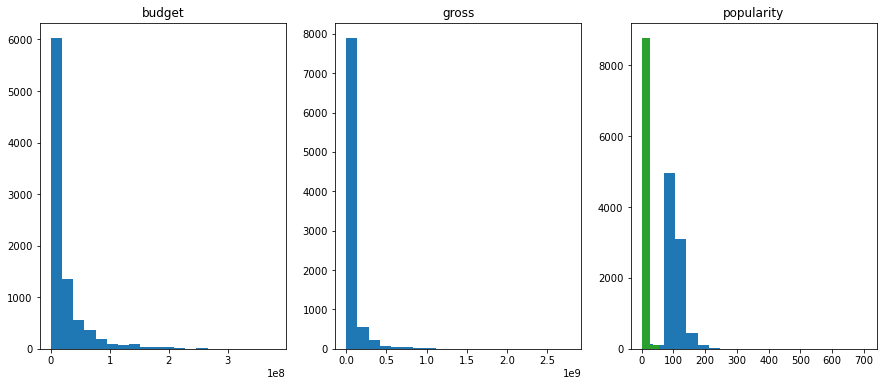

In [92]:
# Using Histograms to to check for outliers in numerical columns
bins = len(kaggle_df)
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.hist(kaggle_df.budget, bins=20)
plt.title('budget')

plt.subplot(1, 3, 2)
plt.hist(kaggle_df.revenue, bins=20)
plt.title('gross')

plt.subplot(1, 3, 3)
plt.hist(kaggle_df.runtime, bins=20)
plt.title('runtime')

plt.subplot(1, 3, 3)
plt.hist(kaggle_df.vote_average, bins=20)
plt.title('vote_average')

plt.subplot(1, 3, 3)
plt.hist(kaggle_df.popularity, bins=20)
plt.title('popularity')

plt.show()


Most Movies had a budget below 100M Budgets, Revenue below 200M and a Runtime between 75 and 160 min
Should movies with extreme outliers in one of these categories be dropped?
Leaving in for now...


## Categorical Analysis

In [94]:
kaggle_df.genres.value_counts()

[{'id': 18, 'name': 'Drama'}]                                                                                                                                             669
[{'id': 35, 'name': 'Comedy'}]                                                                                                                                            522
[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]                                                                                                           281
[{'id': 27, 'name': 'Horror'}]                                                                                                                                            225
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}]                                                                                                               223
                                                                                                                                  

In [95]:
# in percentage
kaggle_df.genres.value_counts(normalize=True)
# that Nicolas Cage is .56% 

[{'id': 18, 'name': 'Drama'}]                                                                                                                                             0.075262
[{'id': 35, 'name': 'Comedy'}]                                                                                                                                            0.058724
[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]                                                                                                           0.031612
[{'id': 27, 'name': 'Horror'}]                                                                                                                                            0.025312
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}]                                                                                                               0.025087
                                                                                                         

In [ ]:
# Bar plot for Star Category  - #too many to see something usefull here
# sn.factorplot('star',data=movies_df,kind='count') 

In [96]:
kaggle_df.production_companies.value_counts()

[]                                                                                                                                                                              731
[{'name': 'Paramount Pictures', 'id': 4}]                                                                                                                                       115
[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]                                                                                                                              93
[{'name': 'Universal Pictures', 'id': 33}]                                                                                                                                       81
[{'name': 'Warner Bros.', 'id': 6194}]                                                                                                                                           73
                                                                                                    

In [101]:
# in percentage
kaggle_df.production_companies.value_counts(normalize=True)


[]                                                                                                                                                                              0.082236
[{'name': 'Paramount Pictures', 'id': 4}]                                                                                                                                       0.012937
[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]                                                                                                                             0.010462
[{'name': 'Universal Pictures', 'id': 33}]                                                                                                                                      0.009112
[{'name': 'Warner Bros.', 'id': 6194}]                                                                                                                                          0.008212
                                                                           

In [ ]:
# Bar plot for Director Category  - #too many to see something usefull here
# sn.factorplot('director',data=movies_df,kind='count') 

In [104]:
kaggle_df.production_countries.value_counts()

[{'iso_3166_1': 'US', 'name': 'United States of America'}]                                                                                        4863
[]                                                                                                                                                 294
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]                                                                                                   268
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]                                         248
[{'iso_3166_1': 'IN', 'name': 'India'}]                                                                                                            204
                                                                                                                                                  ... 
[{'iso_3166_1': 'NO', 'name': 'Norway'}, {'iso_3166_1': 'SE', 'name': 'Sweden'}, {'iso_3166_1'

In [105]:
kaggle_df.production_countries.value_counts(normalize=True)

[{'iso_3166_1': 'US', 'name': 'United States of America'}]                                                                                        0.547081
[]                                                                                                                                                0.033075
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]                                                                                                  0.030150
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]                                        0.027900
[{'iso_3166_1': 'IN', 'name': 'India'}]                                                                                                           0.022950
                                                                                                                                                    ...   
[{'iso_3166_1': 'NO', 'name': 'Norway'}, {'iso_3166_1': 'SE', 'name': 

#### for actors / directors  should we groups the low volumes together?

In [106]:
kaggle_df.spoken_languages.value_counts()

[{'iso_639_1': 'en', 'name': 'English'}]                                                                                                                                                                                                               5308
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'EspaÃ±ol'}]                                                                                                                                                                       221
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'FranÃ§ais'}]                                                                                                                                                                      203
[]                                                                                                                                                                                                                                                  

In [107]:
# in percentage
kaggle_df.spoken_languages.value_counts(normalize=True)

[{'iso_639_1': 'en', 'name': 'English'}]                                                                                                                                                                                                               0.597143
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'EspaÃ±ol'}]                                                                                                                                                                      0.024862
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'FranÃ§ais'}]                                                                                                                                                                     0.022837
[]                                                                                                                                                                                                                                      

In [ ]:
# sn.factorplot('company',data=movies_df,kind='count')  # not very helpful

In [109]:
# Count the number of movies per year  --- looks like 200 is the cap
kaggle_df.release_date.value_counts()

2007-01-01    16
2005-01-01    16
2008-01-01    13
2006-01-01    12
2011-01-01    11
              ..
1980-12-12     1
1994-08-25     1
2000-05-10     1
2004-12-03     1
1966-07-30     1
Name: release_date, Length: 5530, dtype: int64

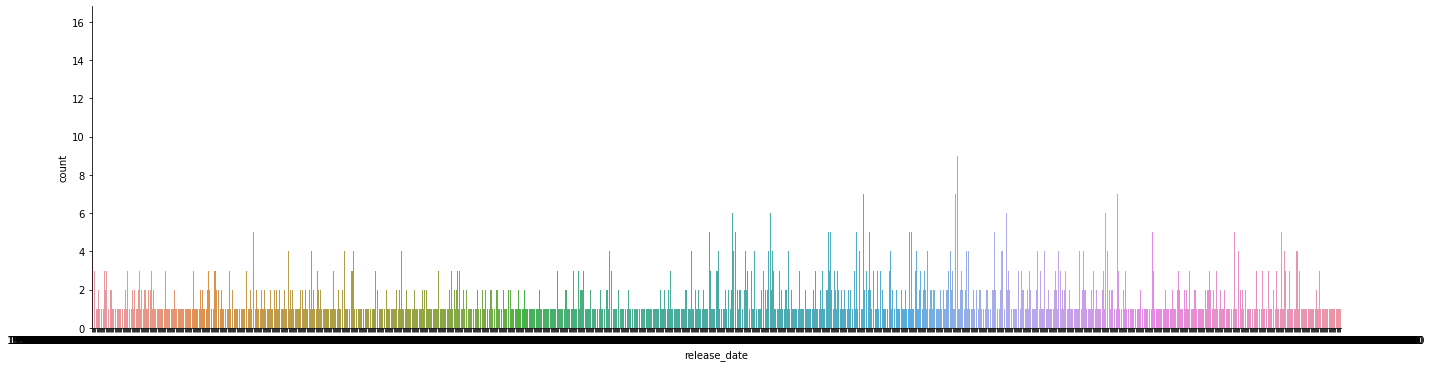

In [108]:
#Plot the numbers of movies released per year

pl = sn.factorplot('release_date',data=kaggle_df, aspect=4,kind='count')
pl.set_xticklabels(step=5)

Text(0.5, 1.0, 'Average Revenue vs. Year of release')

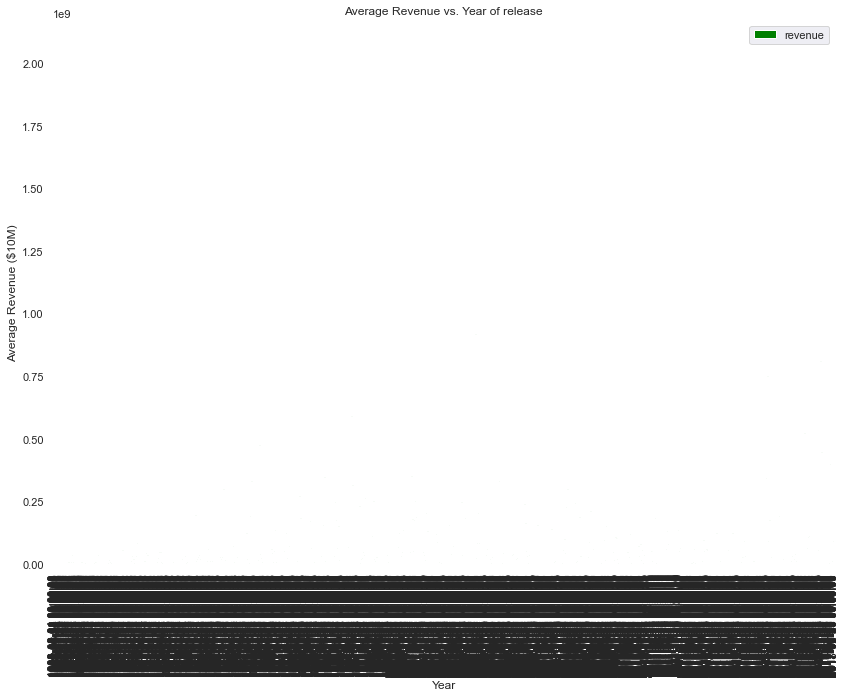

In [110]:
#Revenue compared to release date

mean_year = kaggle_df.groupby('release_date').mean().reset_index()
sn.set()
mean_year.plot.bar(x='release_date', y='revenue', color='green', figsize=(14, 10))
plt.xlabel('Year')
plt.ylabel('Average Revenue ($10M)')
plt.title('Average Revenue vs. Year of release')


The Graph is showing a increase in movies revenue from 1980 to 2020.  
What is causing this?  More Movie theaters? Increase in Rate? More people going to moves?


In [111]:
movies_df["genres"].unique()

NameError: name 'movies_df' is not defined

In [ ]:
plt.figure(figsize=(15,10))
sn.countplot(x = movies_df["genres"])
plt.show()


19 unique Genre, 
Comedies having the larges number of movies in the dataset, followed by Action and then Drama
These 3 make up more than 50% of all the movies in the dataset


# Data Relationships

In [113]:
# look at relationships between Categories and Revenue
kaggle_df_strings = kaggle_df.loc[:, ['genres', 'original_language', 'production_companies', 'production_countries', 'spoken_languages', 'title', 'video', 'video']]
catgs = {}
for i in list(kaggle_df_strings.columns):
    catgs[i] = kaggle_df_strings[i].nunique()
    
catgs

{'genres': 1749,
 'original_language': 54,
 'production_companies': 6638,
 'production_countries': 846,
 'spoken_languages': 883,
 'title': 8651,
 'video': video    1
 video    1
 dtype: int64}

Some Categories have too many values to bar plot - company, director, name, star and writer

Text(0.5, 1.0, 'Average Revenue vs. Country of Release')

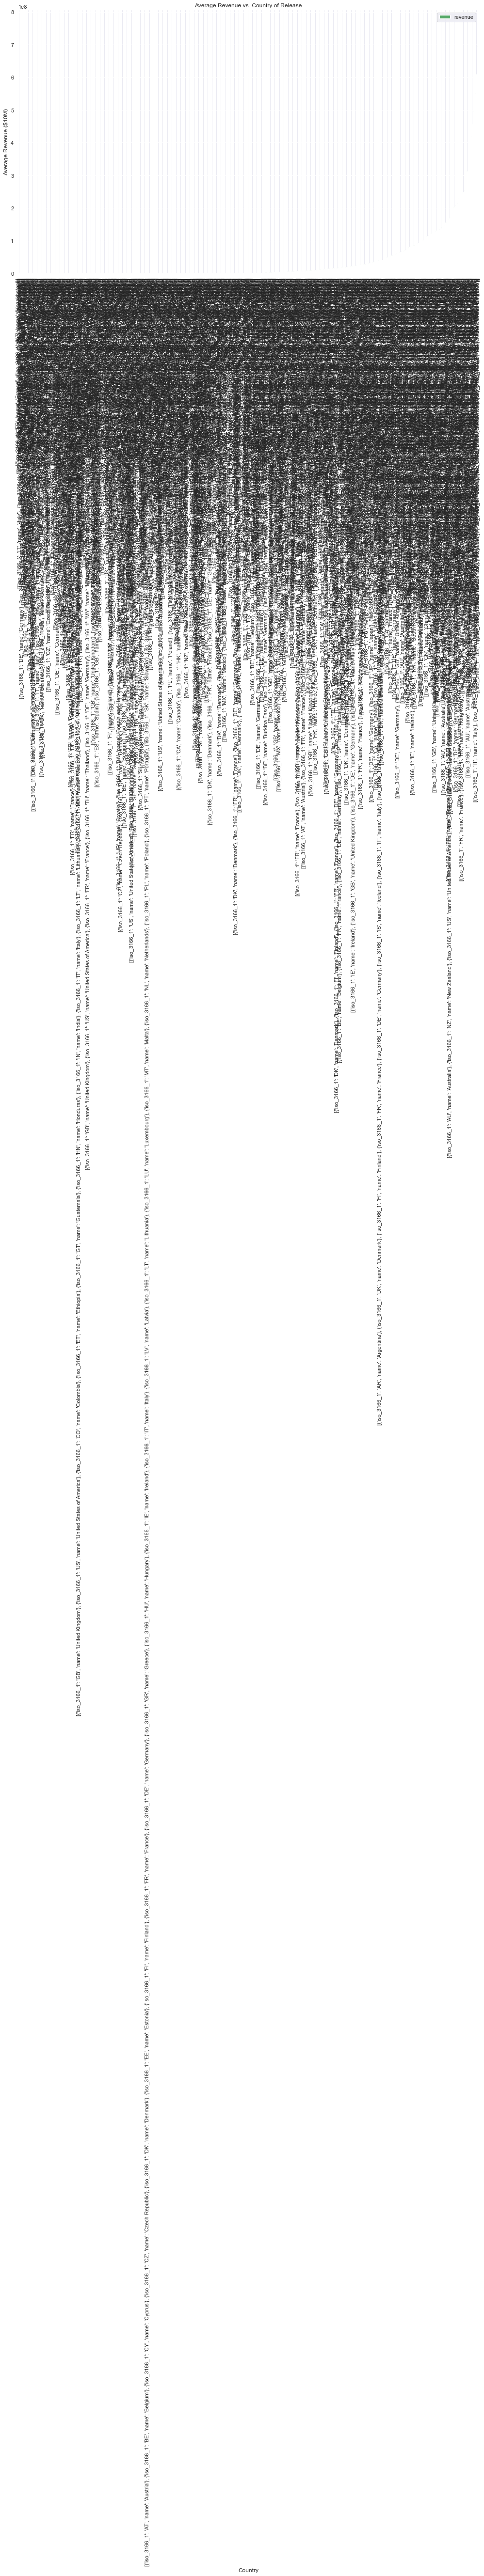

In [115]:
# Average Revenue vs Country of Release
kaggle_df.groupby('production_countries').mean().reset_index().sort_values('revenue').plot.bar(x='production_countries', y='revenue', figsize=(17,10), color='g')
plt.xlabel('Country')
plt.ylabel('Average Revenue ($10M)')
plt.title('Average Revenue vs. Country of Release')

Finland, China, New Zealand adn Malta have the Highest average revenue per release

Text(0.5, 1.0, 'Average Revenue vs. Genre')

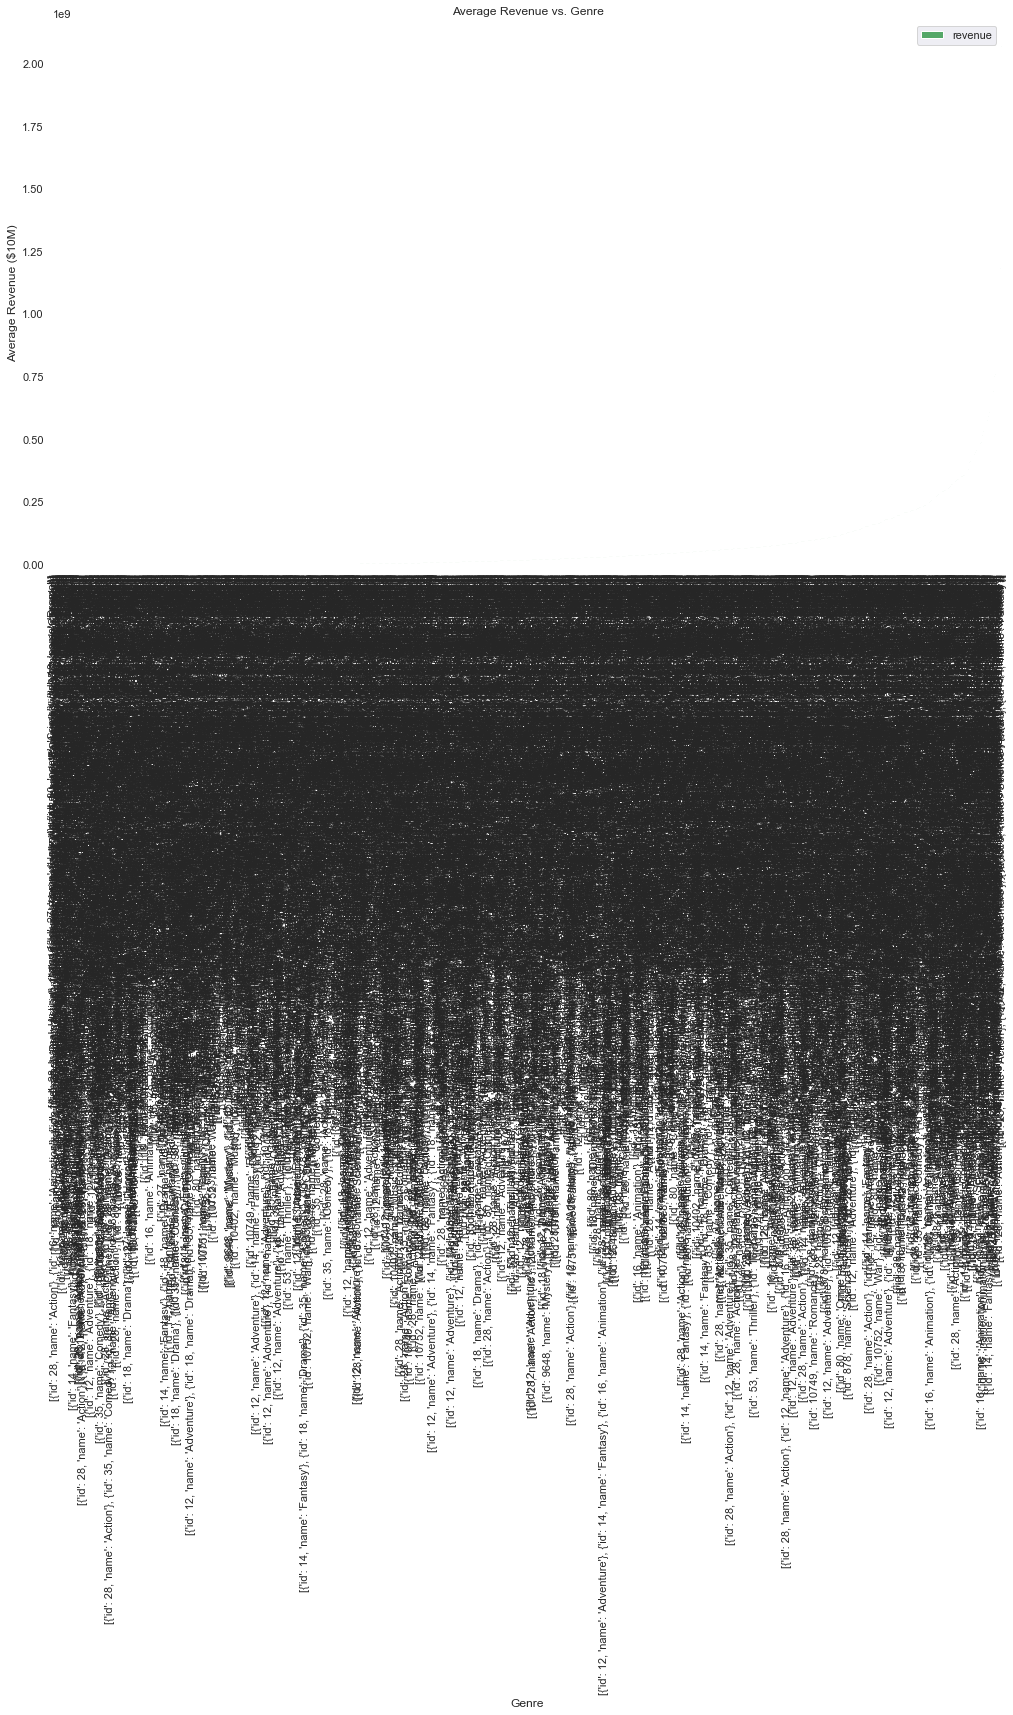

In [116]:
# Average Revenue vs Country of Release
kaggle_df.groupby('genres').mean().reset_index().sort_values('revenue').plot.bar(x='genres', y='revenue', figsize=(17,10), color='g')
plt.xlabel('Genre')
plt.ylabel('Average Revenue ($10M)')
plt.title('Average Revenue vs. Genre')

Text(0.5, 1.0, 'Revenue vs. Genre of Movie')

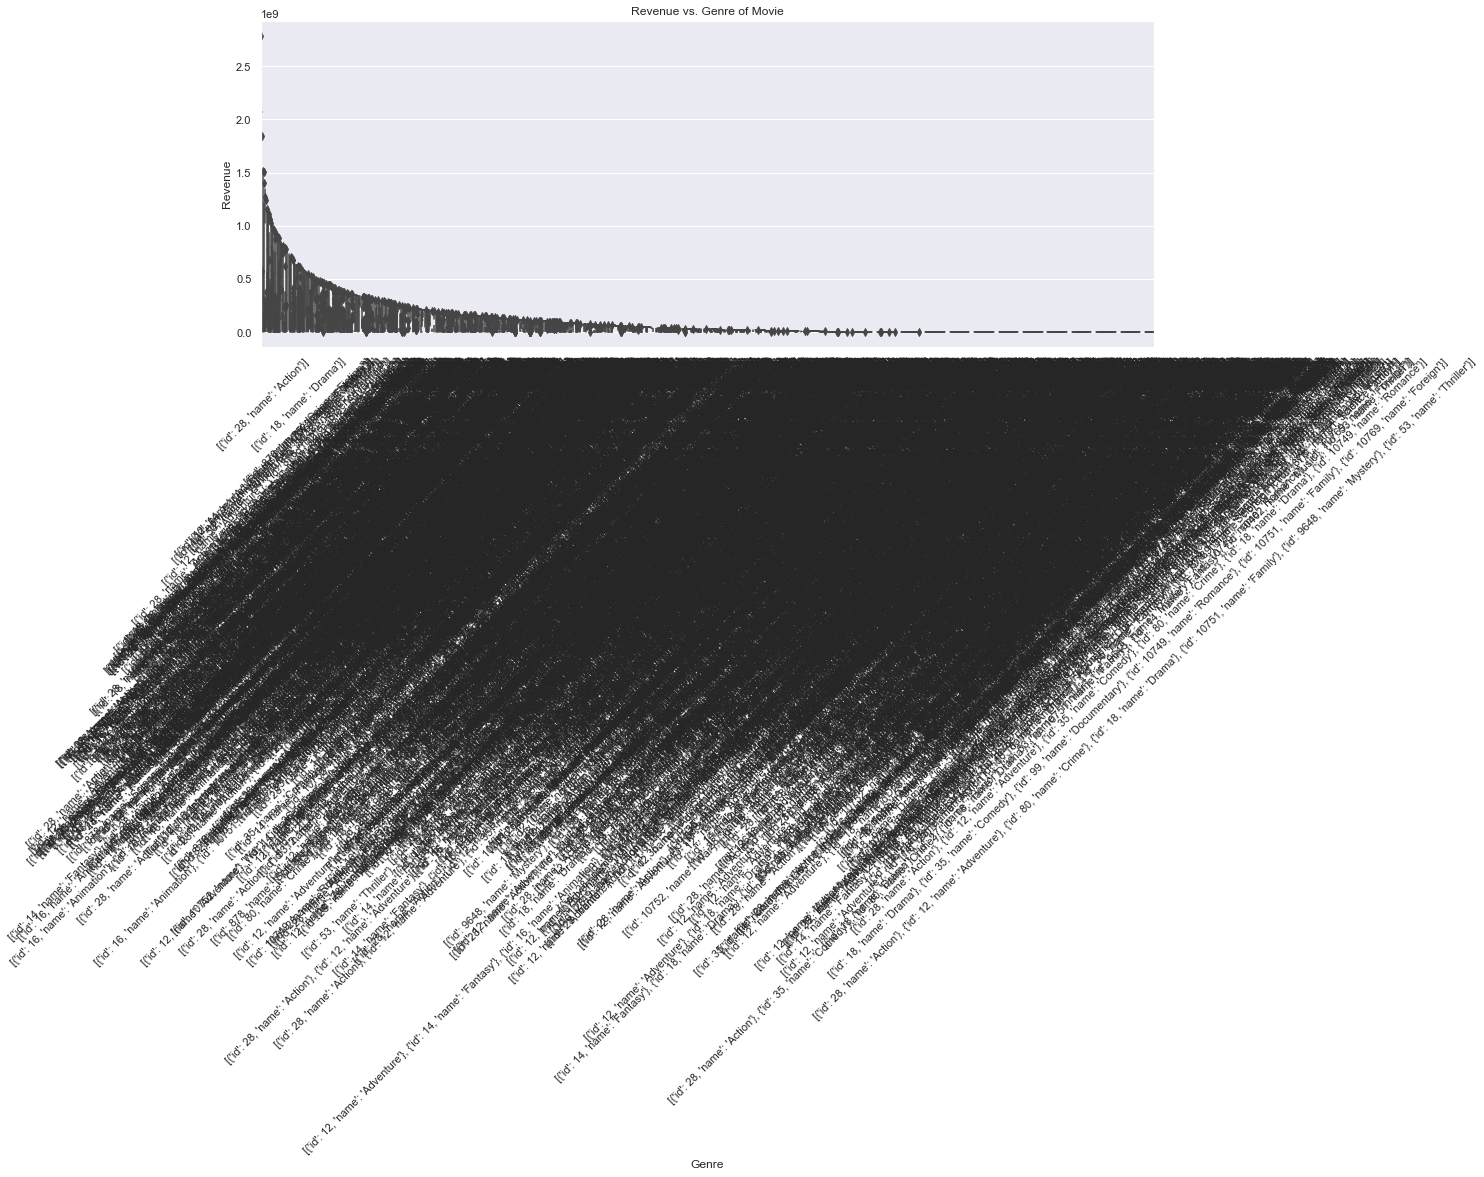

In [117]:
# Genre of movies and Revenue - Box Plot
plt.figure(figsize=(16, 6))
sn.boxplot(x='genres', y='revenue', data=kaggle_df.sort_values('revenue', ascending=False))
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.title('Revenue vs. Genre of Movie')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Budget vs. Revenue')

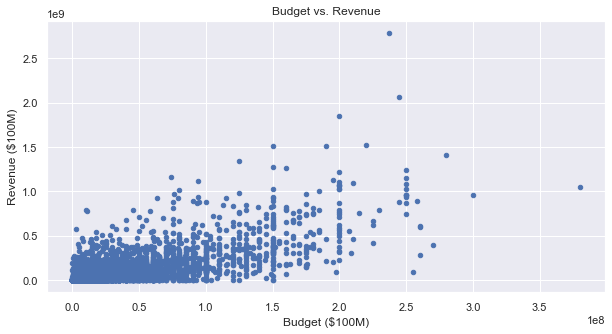

In [118]:
# Scatter PLot - Revenue vs Budget

kaggle_df.plot.scatter(x='budget', y='revenue', figsize=(10, 5))
plt.xlabel('Budget ($100M)')
plt.ylabel('Revenue ($100M)')
plt.title('Budget vs. Revenue')


This shows a somewhat linear relationship between gross revenue and budget which is not suprise.  
One could assume the more you spend to make a movie the more revenue it might make.


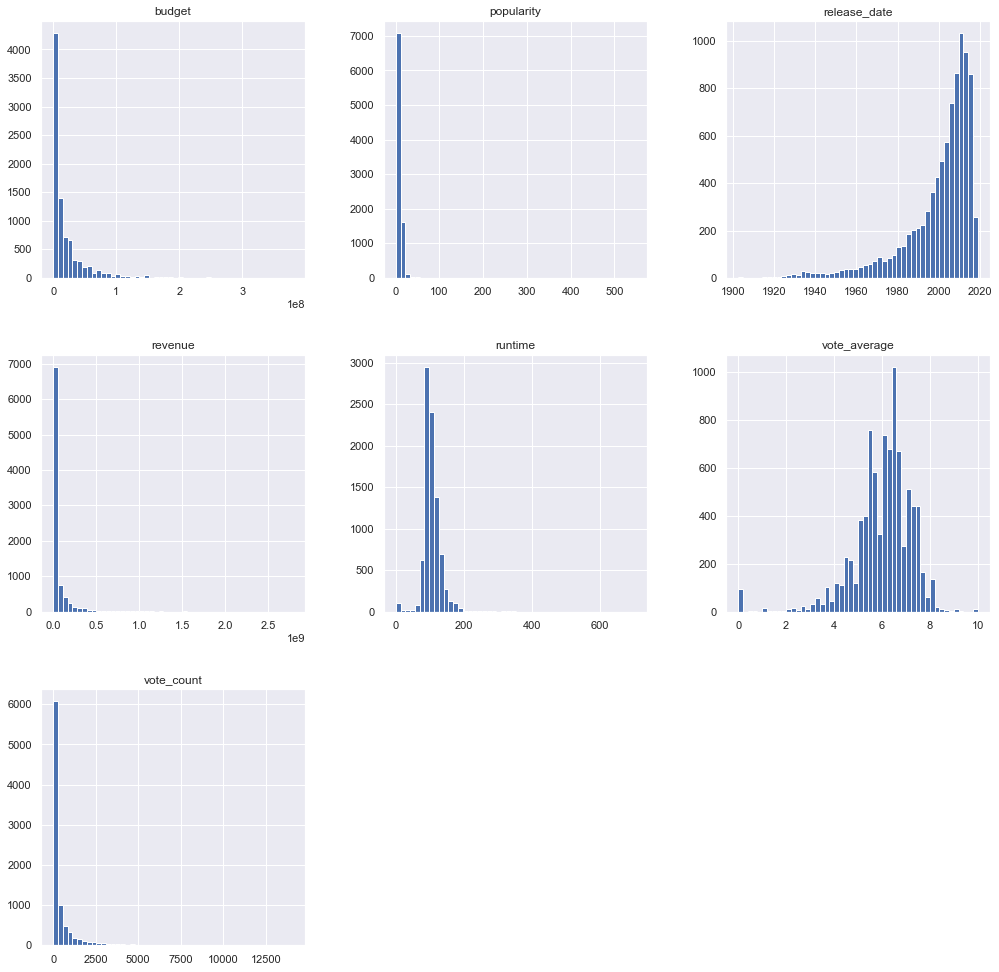

In [119]:
# Distribution Histogram
kaggle_df.hist(bins=50,figsize=(17,17))
plt.show()

UFuncTypeError: ufunc 'multiply' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

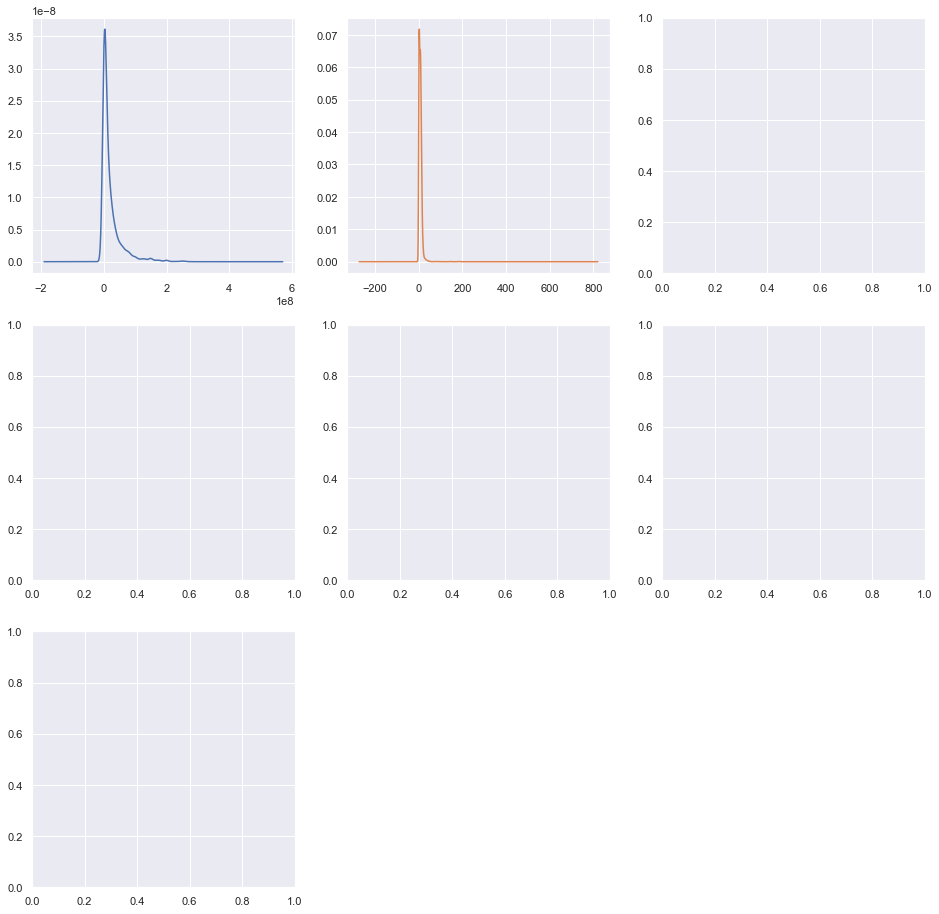

In [120]:
# Distibution - Density
kaggle_df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False,fontsize=10, figsize = (16, 16))
plt.show()


Most Variables seem to be right skewed or positive in relation to our target variable of Gross Revenue
Score seems to be normally distributed


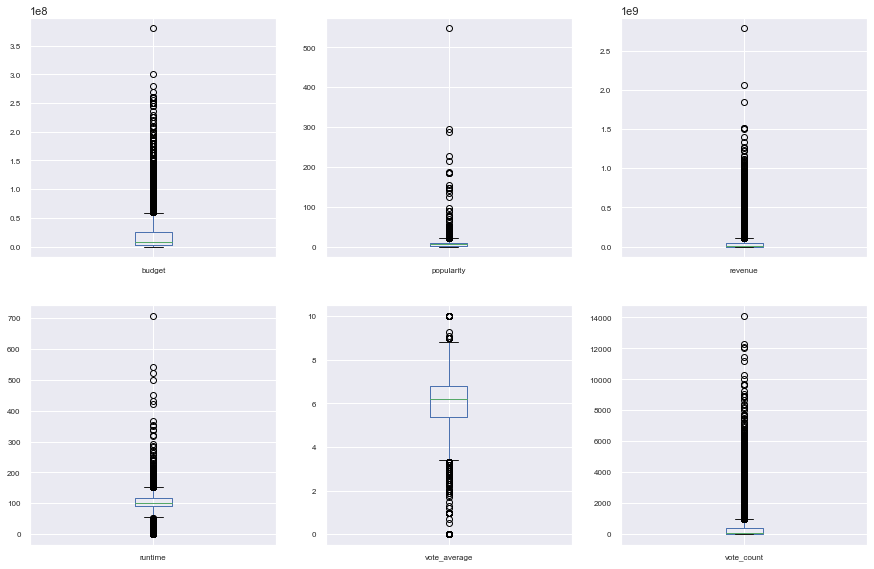

In [121]:
# Box Plot
kaggle_df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,fontsize=8, figsize = (15, 15))
plt.show()

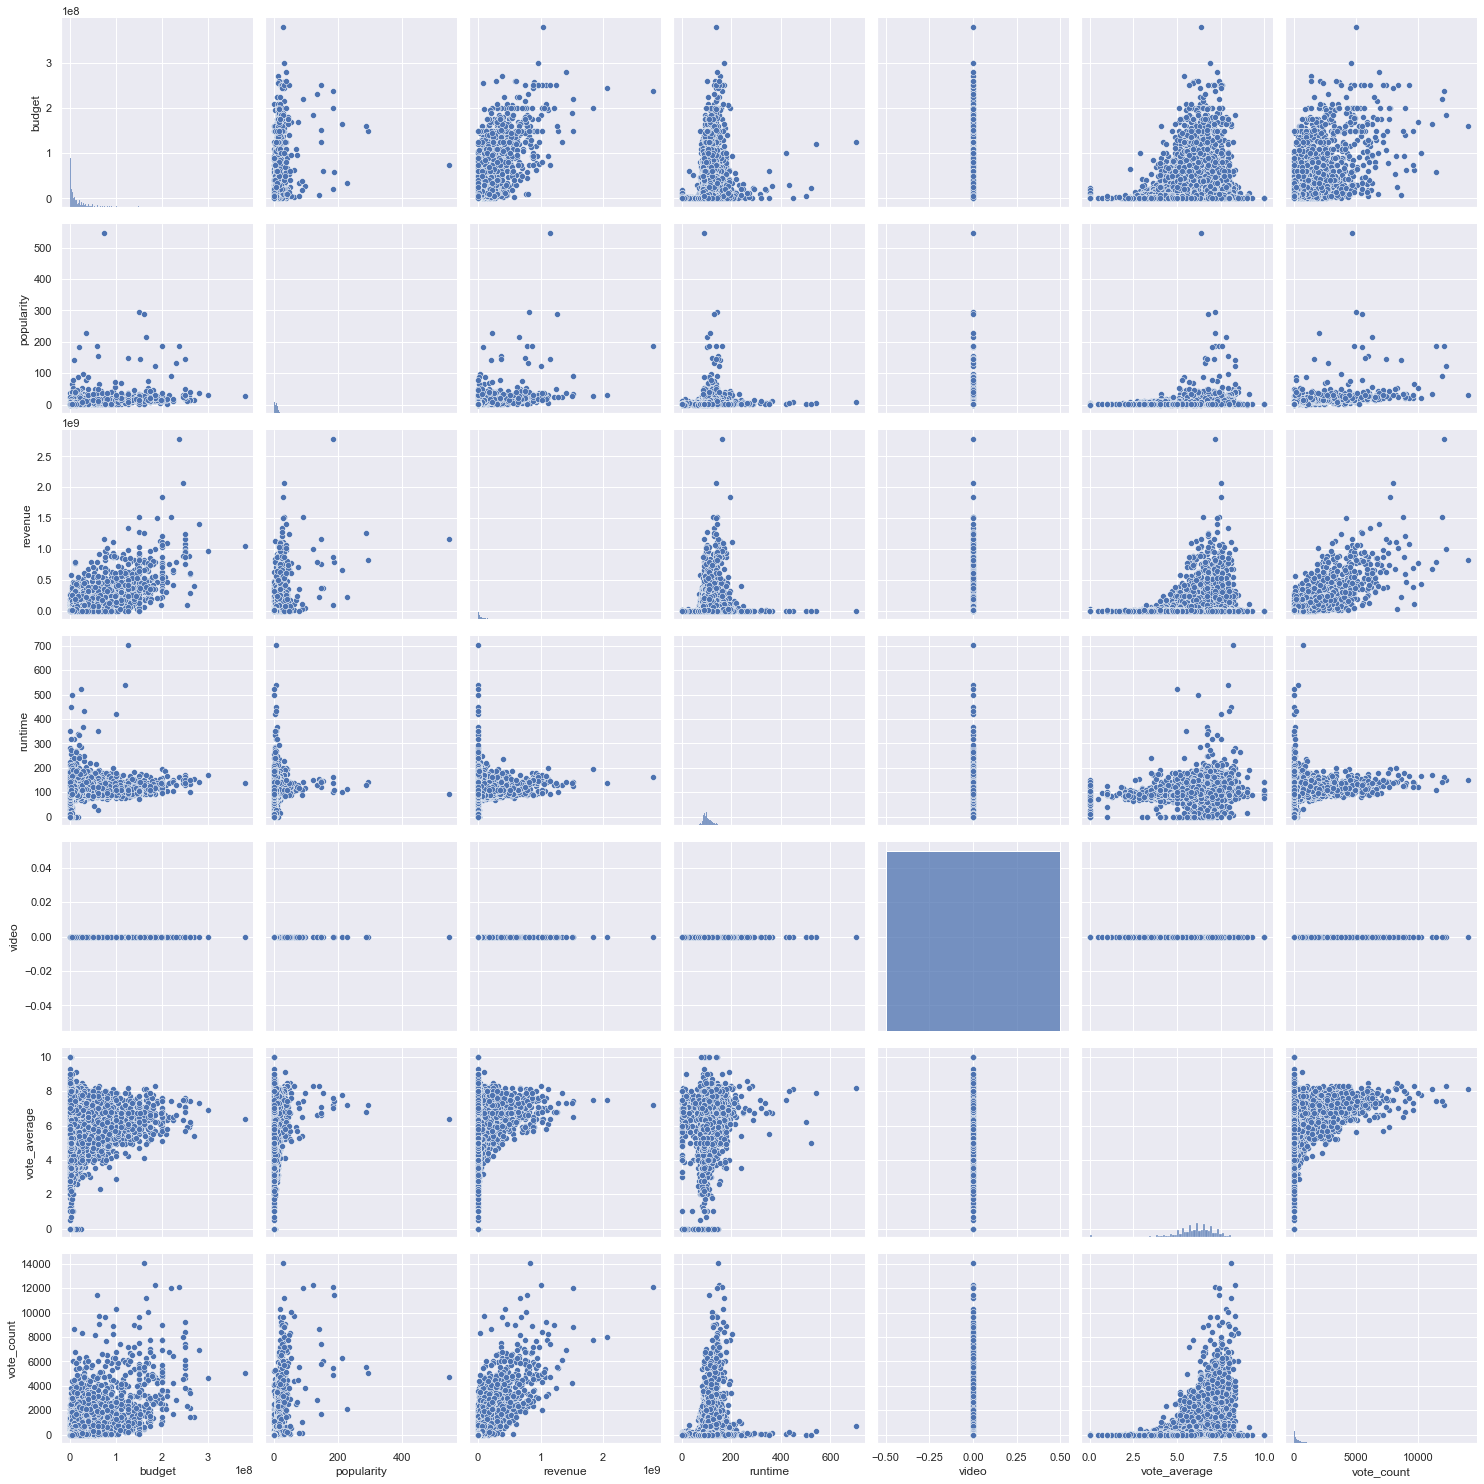

In [122]:
# Scatter Matrix
sn.pairplot(kaggle_df,height=3) # scatter matrix
plt.show()

Looks to be outliers in all features. 

Text(0, 0.5, 'Budget')

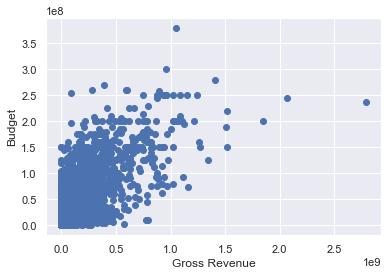

In [125]:
# SCatter of just Gross vs Budget
plt.scatter(kaggle_df["revenue"],kaggle_df["budget"])
plt.xlabel("Gross Revenue")
plt.ylabel("Budget")